In [2]:
import pandas as pd

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.seasonal import seasonal_decompose

In [8]:
df = pd.read_csv('Walmart DataSet.csv')

In [9]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [10]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [11]:
df.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667


In [12]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [13]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [14]:
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [15]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [16]:
df.shape

(6435, 8)

In [17]:
# Handle missing values
df.fillna(method='ffill', inplace=True)

In [18]:
# Summary statistics
print(df.describe())

             Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6435.000000   6435.000000  
mean    171.578394      7.999151  
std      39.356712      1.875885  
min     126.064000      3.879000  
25%     131.735000      6.891000  
50%     182.616521      7.874000  
75%     212.743293      8.622000  
max     227.232807     14.313000  


In [19]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

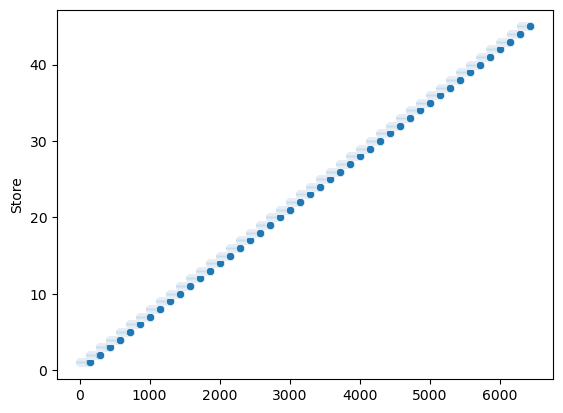

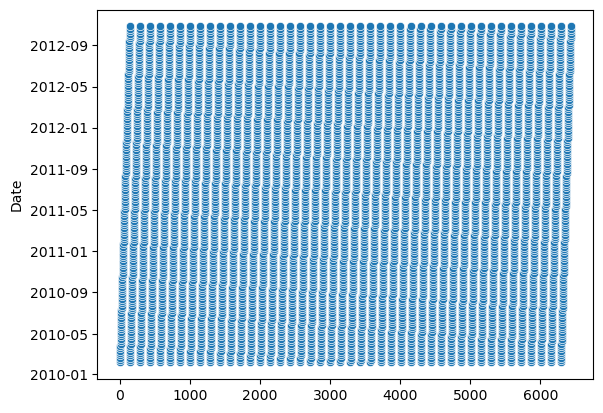

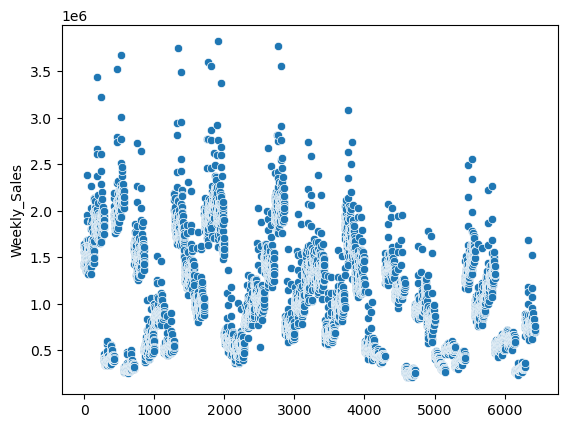

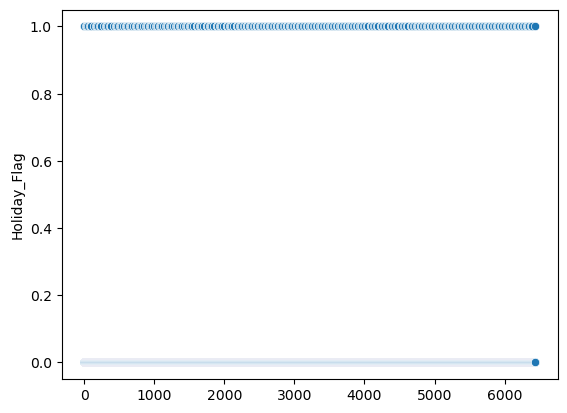

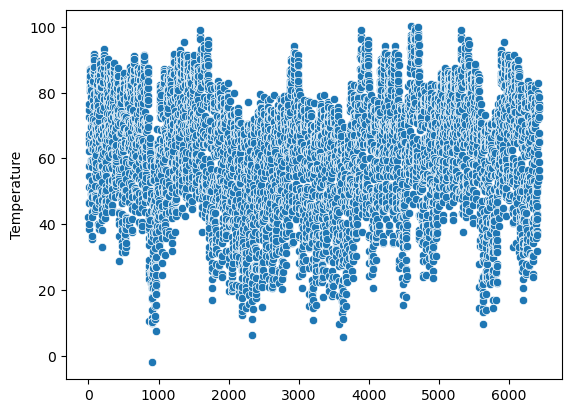

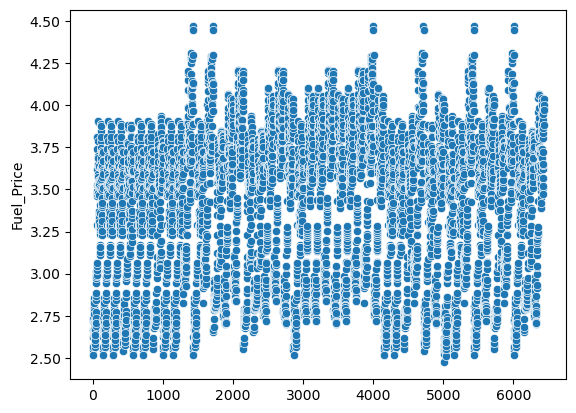

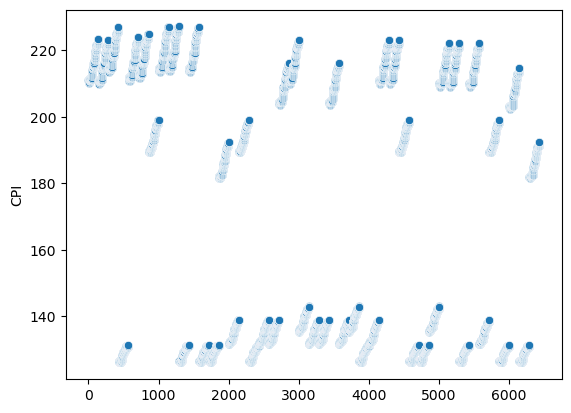

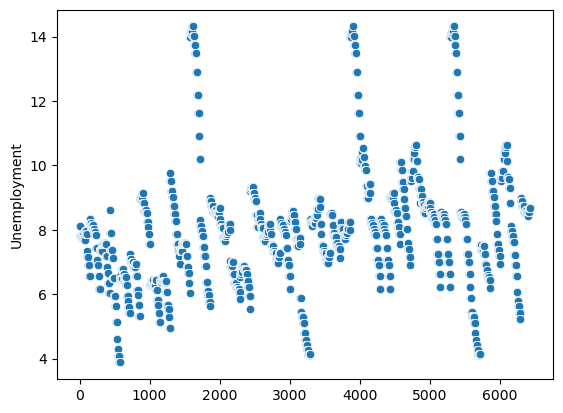

In [39]:
for i in df.columns:
    sns.scatterplot(df[i])
    plt.show()

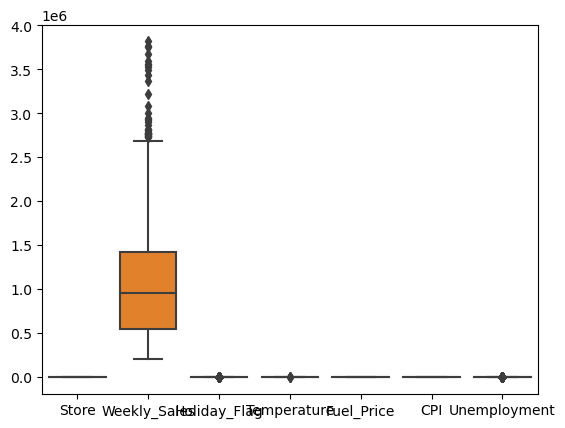

In [20]:
sns.boxplot(df)
plt.show()

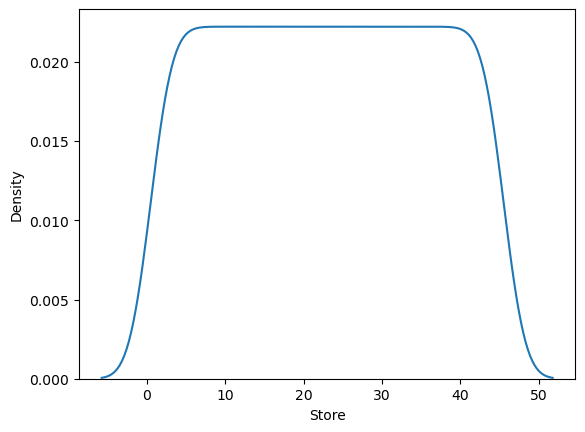

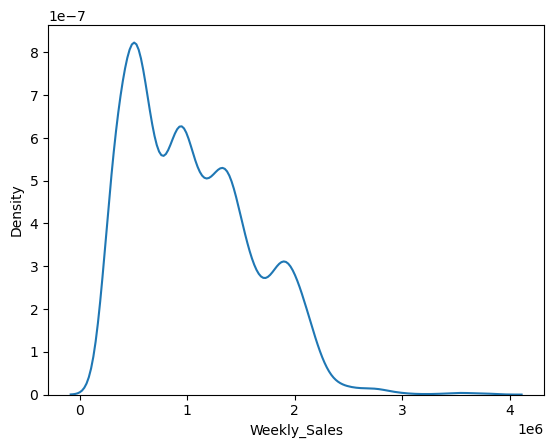

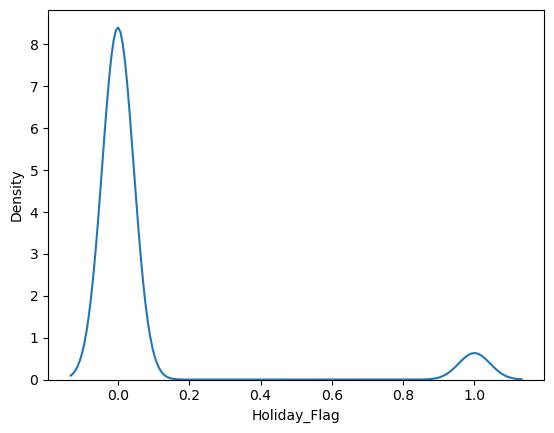

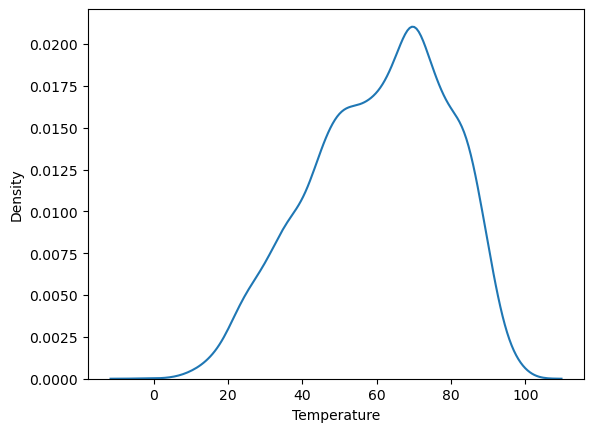

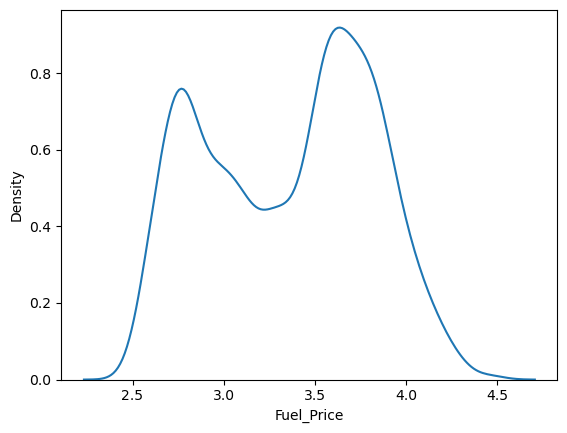

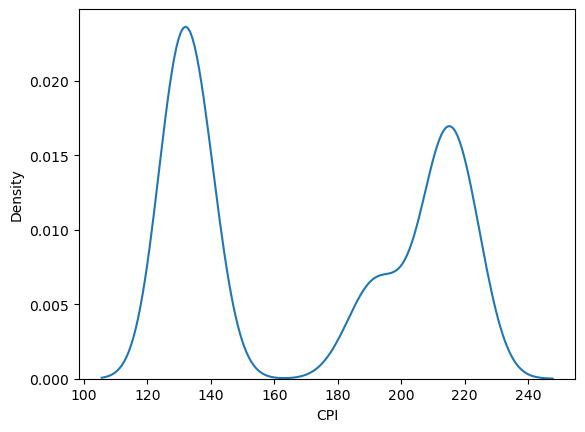

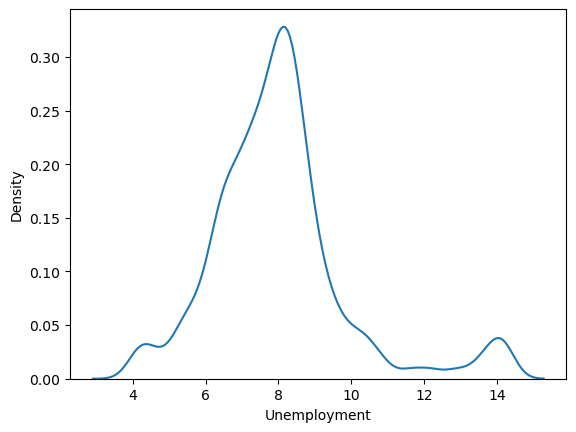

In [40]:
for i in df_num:
    sns.kdeplot(df[i] )
    plt.show()

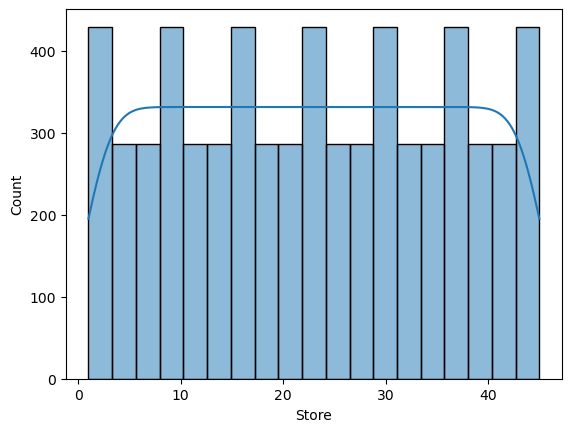

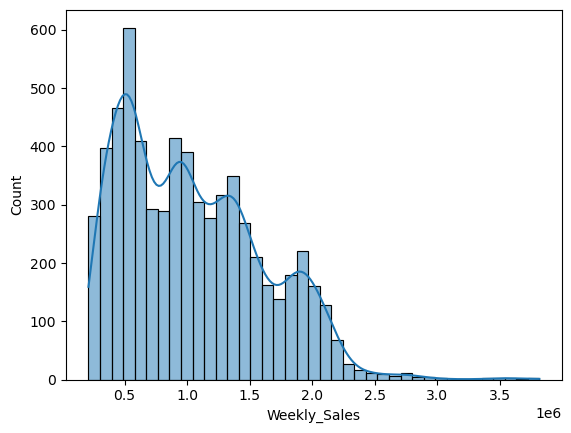

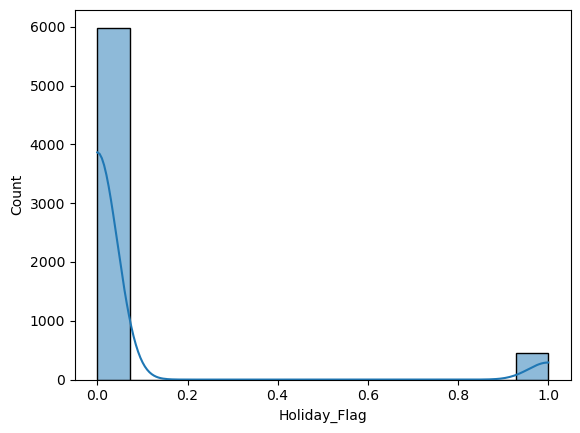

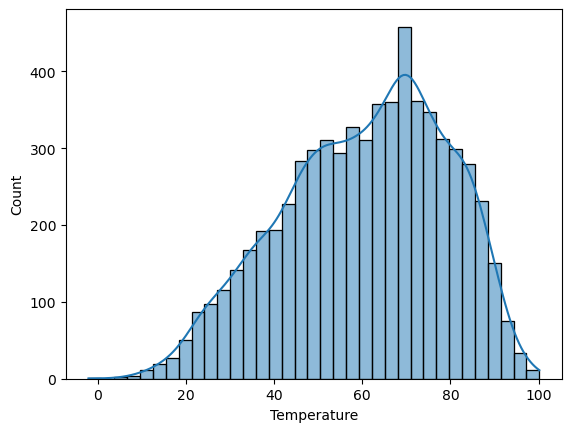

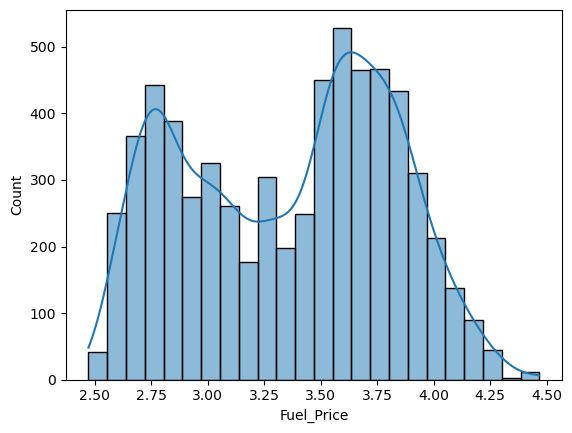

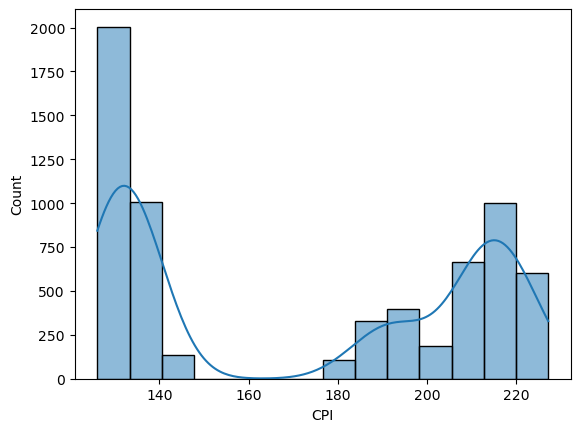

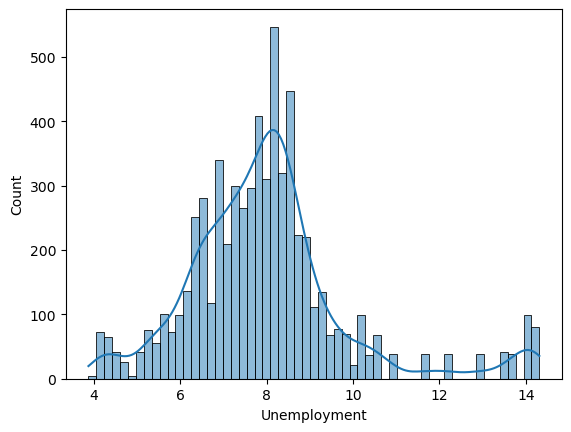

In [41]:
for i in df_num:
    sns.histplot(df[i] , kde = True )
    plt.show()

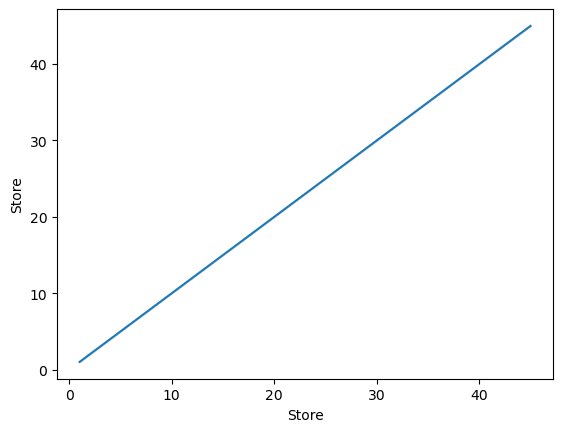

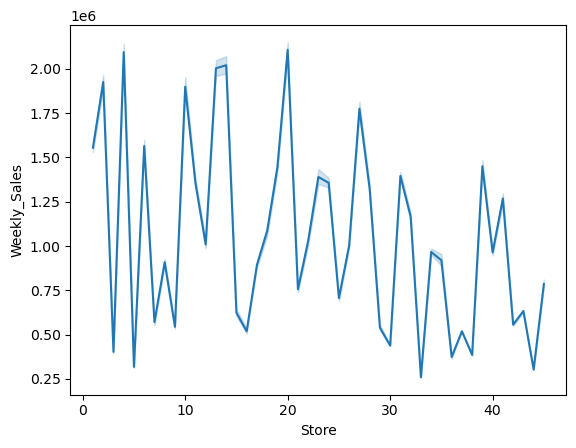

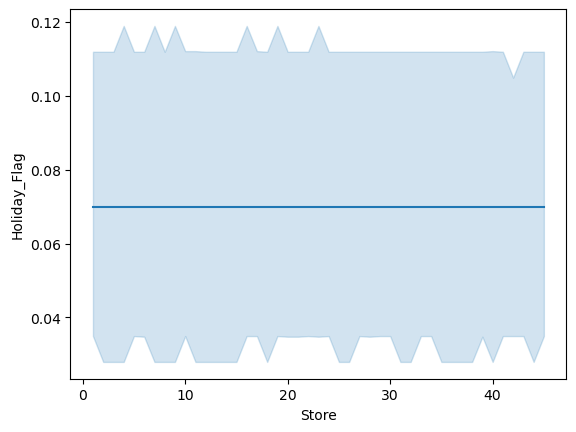

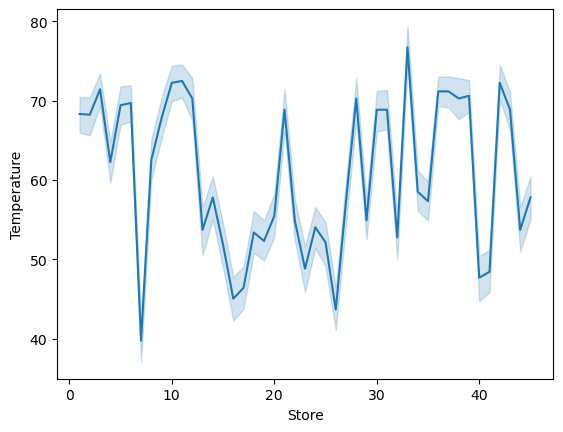

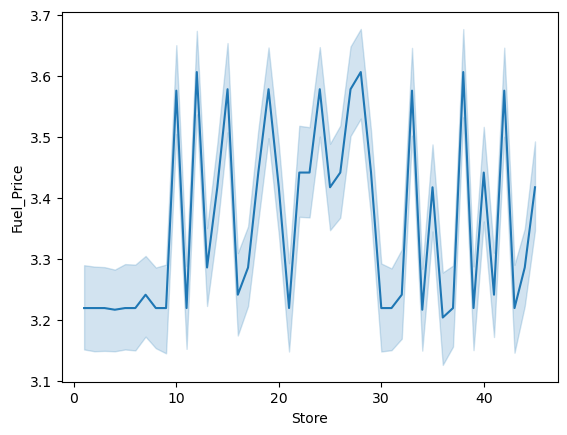

In [ ]:
for i in df_num:
    for j in df_num:
        sns.lineplot(x = df[i] , y = df[j])
        plt.show()

In [21]:
df_num = df.select_dtypes(include = 'number')

In [22]:
df_cat = df.select_dtypes(exclude = 'number')

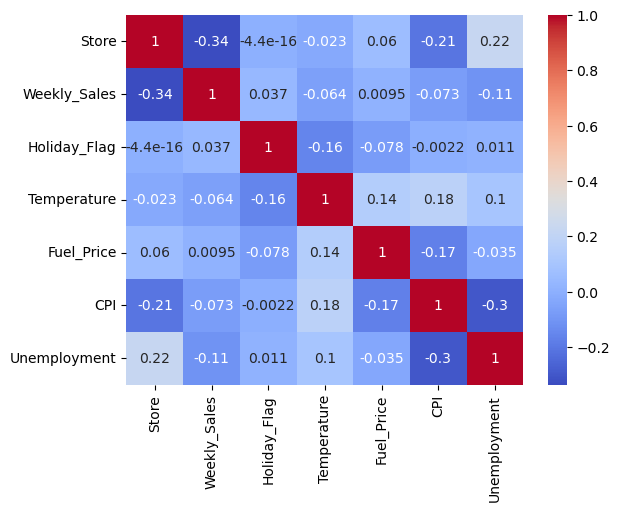

In [23]:
sns.heatmap(df_num.corr() , annot = True , cmap = 'coolwarm')
plt.show()

In [24]:
x = df[['Unemployment']]
y = df['Weekly_Sales']
model = LinearRegression()
model.fit(x, y)
print(f'Coefficient: {model.coef_}, Intercept: {model.intercept_}')

Coefficient: [-31943.45497255], Intercept: 1302485.398912583


# A

In [25]:
# Check correlation between Weekly_Sales and Unemployment
correlation = df[['Weekly_Sales', 'Unemployment']].corr()
print("Correlation between Weekly Sales and Unemployment Rate:\n", correlation)

Correlation between Weekly Sales and Unemployment Rate:
               Weekly_Sales  Unemployment
Weekly_Sales      1.000000     -0.106176
Unemployment     -0.106176      1.000000


In [26]:
# Group data by store and calculate the correlation between Unemployment and Weekly_Sales for each store
store_unemployment_corr = df.groupby('Store')[['Weekly_Sales', 'Unemployment']].corr().unstack().iloc[:, 1]

# Sort the stores by the impact of Unemployment on Weekly Sales
store_unemployment_corr = store_unemployment_corr.reset_index(level=0, drop=True).sort_values()

# Print the stores most affected by unemployment (Top negative correlations)
print("Stores most negatively impacted by unemployment: \n", store_unemployment_corr.head())


Stores most negatively impacted by unemployment: 
 37   -0.785290
43   -0.780076
38   -0.384681
41   -0.356355
40   -0.350630
Name: (Weekly_Sales, Unemployment), dtype: float64


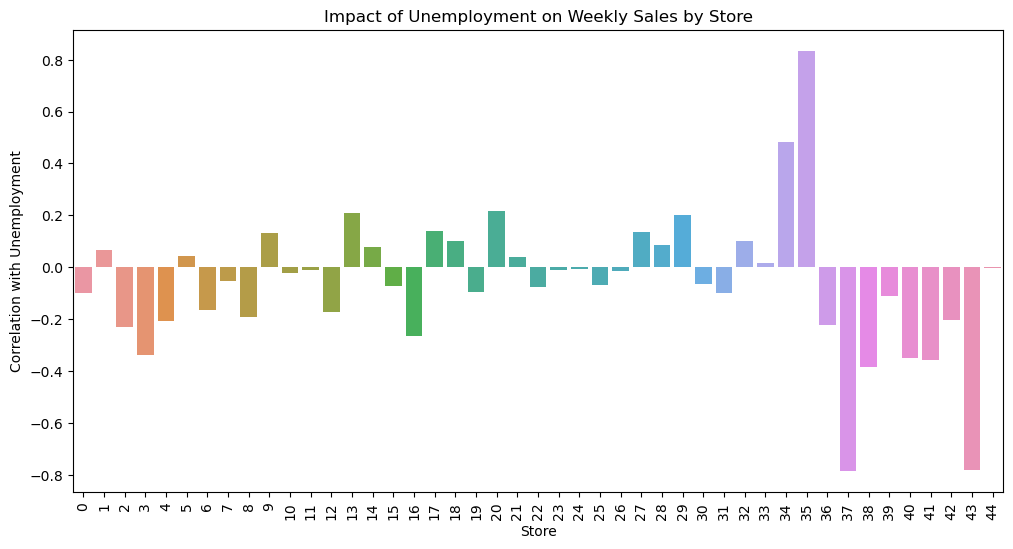

In [27]:
# Plot the impact of unemployment on weekly sales for each store
plt.figure(figsize=(12, 6))
sns.barplot(x=store_unemployment_corr.index, y=store_unemployment_corr.values)
plt.title('Impact of Unemployment on Weekly Sales by Store')
plt.xlabel('Store')
plt.ylabel('Correlation with Unemployment')
plt.xticks(rotation=90)
plt.show()


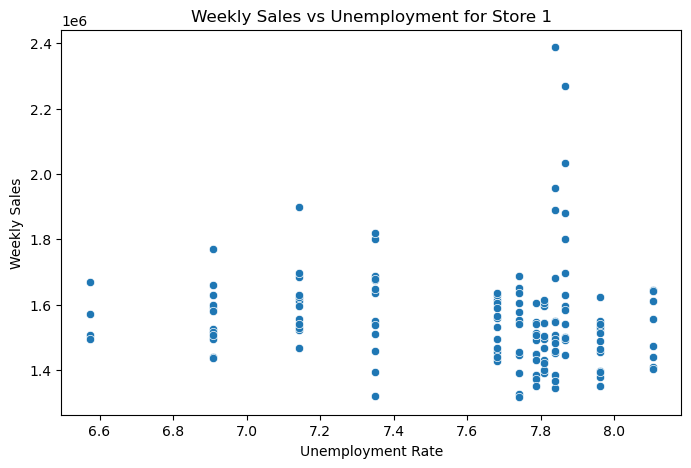

In [28]:
# Choose one store to plot sales vs unemployment
store_number = 1  # You can change this to any store number you want to visualize
store_data = df[df['Store'] == store_number]

# Scatter plot for Weekly Sales vs Unemployment for the chosen store
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Unemployment', y='Weekly_Sales', data=store_data)
plt.title(f'Weekly Sales vs Unemployment for Store {store_number}')
plt.xlabel('Unemployment Rate')
plt.ylabel('Weekly Sales')
plt.show()


# B

In [29]:
print(df.columns)


Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')


In [30]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Verify the change
print(df.info())

# View the first few rows to confirm
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB
None


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


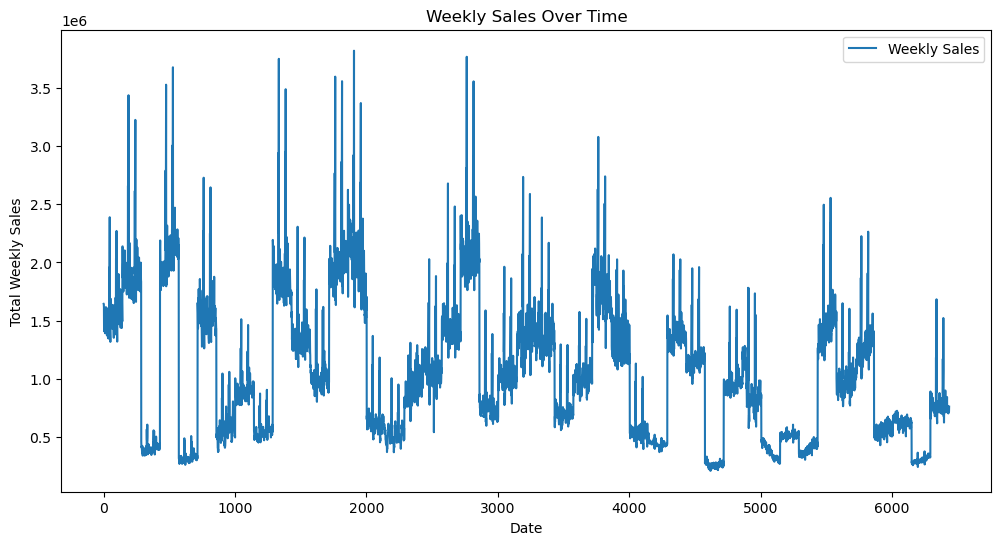

In [31]:
# Aggregate weekly sales data by date (across all stores)
weekly_sales = df['Weekly_Sales']

# Plot the overall sales trend
plt.figure(figsize=(12, 6))
plt.plot(weekly_sales, label='Weekly Sales')
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales')
plt.legend()
plt.show()


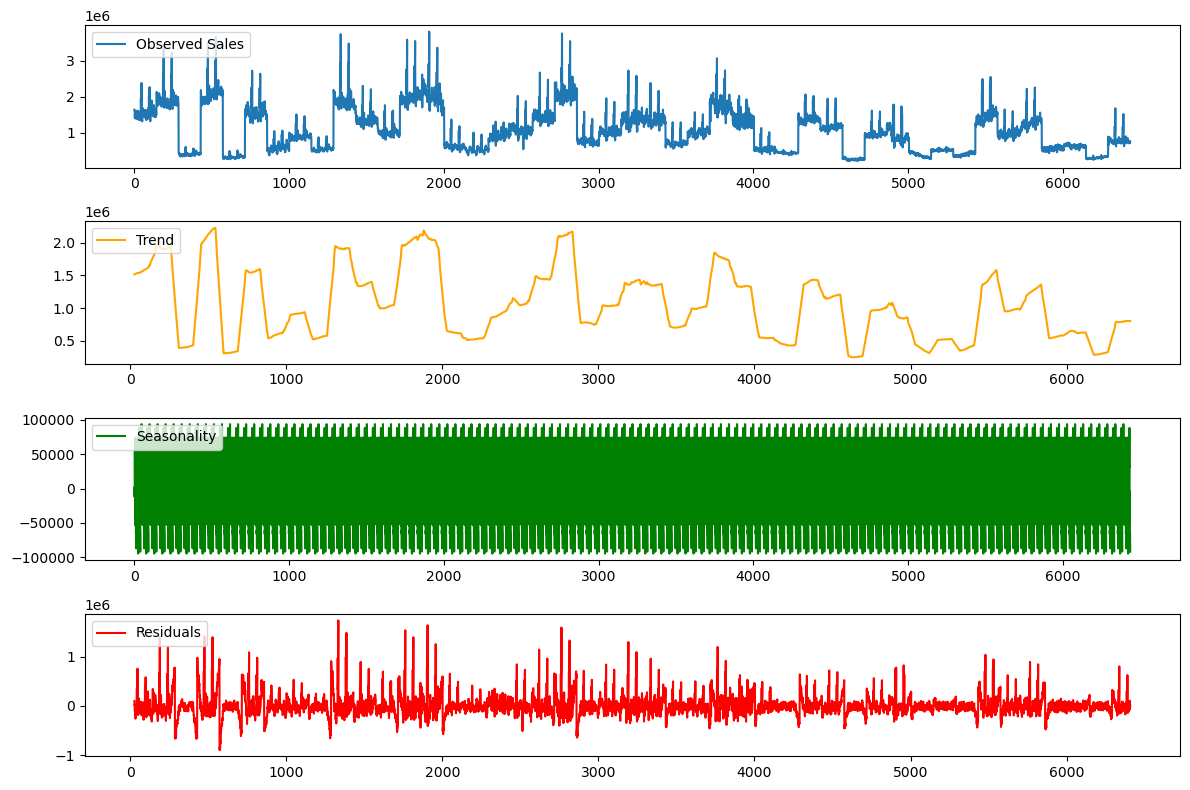

In [32]:
# Perform time series decomposition to separate trend, seasonality, and residuals
decomposition = seasonal_decompose(weekly_sales, model='additive', period=52)  # Assuming annual seasonality

# Plot the decomposition
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(decomposition.observed, label='Observed Sales')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality', color='green')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals', color='red')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


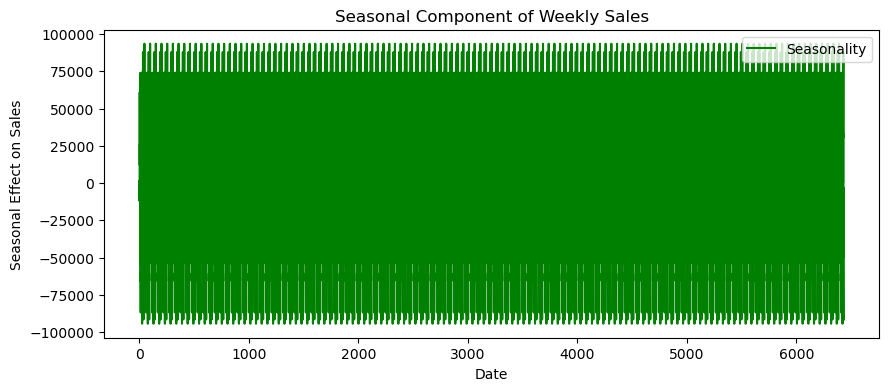

In [38]:
# Plot just the seasonality component to better analyze
plt.figure(figsize=(10, 4))
plt.plot(decomposition.seasonal, label='Seasonality', color='green')
plt.title('Seasonal Component of Weekly Sales')
plt.xlabel('Date')
plt.ylabel('Seasonal Effect on Sales')
plt.legend()
plt.show()


**Hypothesis:
Seasonal Peaks: If there are sharp increases in the seasonality plot during certain weeks, it might be due to holidays (e.g., Thanksgiving, Christmas, etc.) or other events that drive up sales.
Seasonal Dips: Seasonal dips might occur during off-seasons, when demand is generally lower (e.g., post-holiday months like January or February).**

# C

Correlation between Temperature and Weekly Sales: -0.06381001317946962


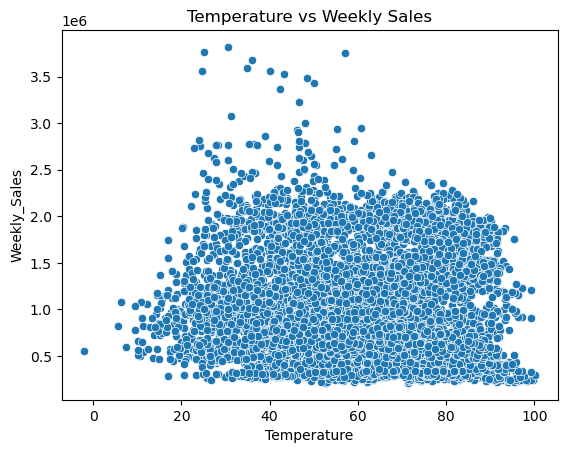

In [34]:
# Correlation between Temperature and Weekly Sales
corr_temp_sales = df['Temperature'].corr(df['Weekly_Sales'])
print(f'Correlation between Temperature and Weekly Sales: {corr_temp_sales}')

# Scatter plot
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=df)
plt.title('Temperature vs Weekly Sales')
plt.show()

# D

Correlation between CPI and Weekly Sales: -0.07263416204017645
CPI Coefficient: [-1041.55795251], Intercept: 1225673.7181543761


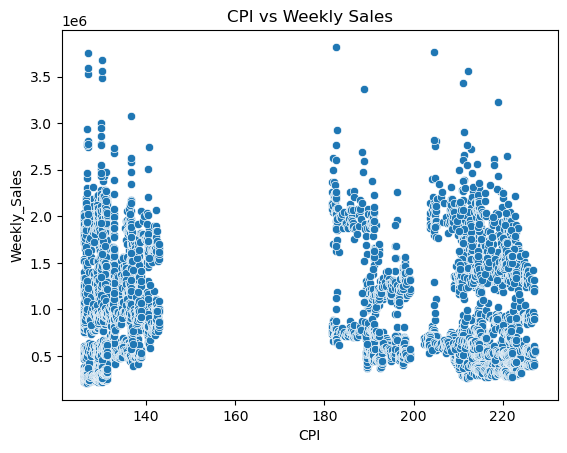

In [35]:
# Correlation between CPI and Weekly Sales
corr_cpi_sales = df['CPI'].corr(df['Weekly_Sales'])
print(f'Correlation between CPI and Weekly Sales: {corr_cpi_sales}')
# Regression analysis
X_cpi = df[['CPI']]
model_cpi = LinearRegression()
model_cpi.fit(X_cpi, y)
print(f'CPI Coefficient: {model_cpi.coef_}, Intercept: {model_cpi.intercept_}')

# Scatter plot
sns.scatterplot(x='CPI', y='Weekly_Sales', data=df)
plt.title('CPI vs Weekly Sales')
plt.show()




# E

In [36]:
# Total sales per store
store_sales = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)
top_stores = store_sales.head(5)
print(f'Top Performing Stores:\n{top_stores}')

Top Performing Stores:
Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
Name: Weekly_Sales, dtype: float64


In [37]:
# Worst performing store
worst_store = store_sales.tail(1)
print(f'Worst Performing Store:\n{worst_store}')

# Difference between highest and lowest performing stores
difference = top_stores.iloc[0] - worst_store.iloc[0]
print(f'Difference between highest and lowest performing stores: {difference}')

Worst Performing Store:
Store
33    37160221.96
Name: Weekly_Sales, dtype: float64
Difference between highest and lowest performing stores: 264237570.49999997
